<a href="https://colab.research.google.com/github/stevensmiley1989/TensorFlow_Examples/blob/main/TF_CNN_Sequential_Classification_Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Purpose
The purpose of this notebook is to create a Convolutional Neural Network (CNN) with TensorFlow for prediction with fashion mnist dataset.

# 2.0 Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__

'2.5.0'

# 3.0 Import Fashion MNIST data

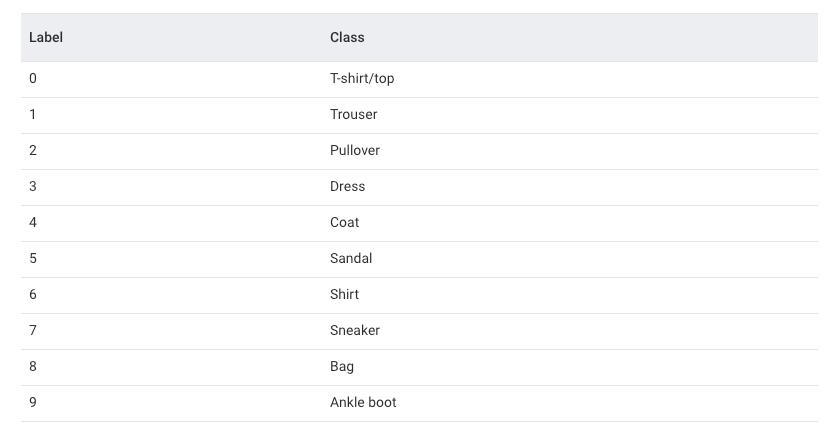

In [3]:
dict_labels={0:'T-shirt/top',
             1:'Trouser',
             2:'Pullover',
             3:'Dress',
             4:'Coat',
             5:'Sandal',
             6:'Shirt',
             7:'Sneaker',
             8:'Bag',
             9:'Ankle boot'}

In [33]:
mnist = tf.keras.datasets.fashion_mnist

In [34]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

# 4.0 Preprocess Data

In [35]:
x_train[0] #notice that values are in range 0, 255.  We should normalize them

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [36]:
x_train=x_train/255.0 #normalize between 0 and 1
x_test=x_test/255.0 #normalize between 0 and 1

(<matplotlib.image.AxesImage at 0x7f25653cacd0>, (28, 28))

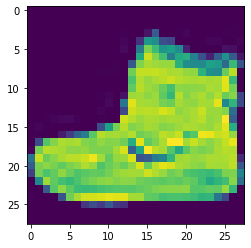

In [8]:
plt.imshow(x_train[0]), x_train[0].shape

In [9]:
dict_labels.get(y_train[0])

'Ankle boot'

# 4.1 myCallback 

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.91):
      print("\nReached 91% accuracy so cancelling training!")
      self.model.stop_training = True

In [11]:
callbacks=myCallback()

# 5.0 Create MLP DNN Sequential Model

## 5.0.1 MLP, 1 hidden layer, optimizer=Adam, loss=sparse_categorical_crossentropy, metrics=accuracy, callbacks=91%, epochs=5

In [12]:
model1=tf.keras.Sequential()
input_shape=x_train[0].shape
input_shape
model1.add(tf.keras.layers.Flatten(input_shape=input_shape))
model1.add(tf.keras.layers.Dense(128, activation = 'relu'))
model1.add(tf.keras.layers.Dense(10,activation='softmax'))
model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
%%time
model1.fit(x_train,y_train,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5031 - accuracy: 0.8231
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3748 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3363 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3128 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2937 - accuracy: 0.8925
CPU times: user 22.6 s, sys: 2.58 s, total: 25.2 s
Wall time: 21.2 s


In [15]:
model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3578 - accuracy: 0.8697


[0.3578368127346039, 0.869700014591217]

In [16]:
y_pred=model1.predict(x_test)

In [17]:
y_pred[0]

array([2.1711050e-05, 7.5641244e-09, 2.7302496e-08, 1.6343385e-08,
       8.6419988e-08, 1.5673365e-02, 1.8122233e-06, 4.3779429e-02,
       2.3375203e-05, 9.4050020e-01], dtype=float32)

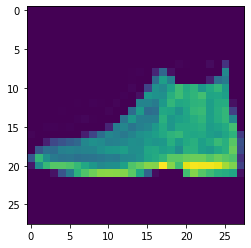

In [18]:
plt.imshow(np.squeeze(x_test[0]))

In [19]:
dict_labels.get(np.argmax(y_pred[0])),np.argmax(y_pred[0]),f'{np.round(100*y_pred[0][np.argmax(y_pred[0])],2)}%'

('Ankle boot', 9, '94.05%')

In [20]:
model1.save('model1') #save model

INFO:tensorflow:Assets written to: model1/assets


In [21]:
model1=tf.keras.models.load_model('model1') #load model

# 5.1 Create MLP CNN Sequential Model

## 5.1.1 MLP, CNN, optimizer=Adam, loss=sparse_categorical_crossentropy, metrics=accuracy, callbacks=91%, epochs=5

In [22]:
model2=tf.keras.Sequential()
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
input_shape=x_train[0].shape
input_shape
model2.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=input_shape))
model2.add(tf.keras.layers.MaxPooling2D(2,2))
model2.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(2,2))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128, activation = 'relu'))
model2.add(tf.keras.layers.Dense(10,activation='softmax'))
model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [24]:
%%time
model2.fit(x_train,y_train,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.4393 - accuracy: 0.8389
Epoch 2/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2912 - accuracy: 0.8926
Epoch 3/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.2487 - accuracy: 0.9077
Epoch 4/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2175 - accuracy: 0.9189

Reached 91% accuracy so cancelling training!
CPU times: user 9min 47s, sys: 21.7 s, total: 10min 9s
Wall time: 5min 47s


In [25]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.2523 - accuracy: 0.9088


[0.2523423135280609, 0.9088000059127808]

In [26]:
y_pred=model2.predict(x_test)

In [27]:
y_pred[0]

array([9.0169920e-08, 8.6272320e-07, 2.8307115e-08, 1.0627349e-07,
       1.7950960e-09, 2.8298980e-05, 4.0213571e-08, 1.5636598e-04,
       8.1692640e-08, 9.9981409e-01], dtype=float32)

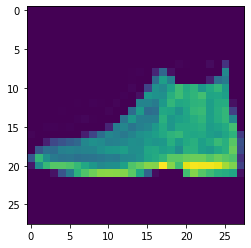

In [28]:
plt.imshow(np.squeeze(x_test[0]))

In [29]:
dict_labels.get(np.argmax(y_pred[0])),np.argmax(y_pred[0]),f'{np.round(100*y_pred[0][np.argmax(y_pred[0])],2)}%'

('Ankle boot', 9, '99.98%')

In [30]:
model2.save('model2') #save model

INFO:tensorflow:Assets written to: model2/assets


In [31]:
model2=tf.keras.models.load_model('model2') #load model

Much more accurate model using the CNN with the same number of epochs.  However, it took longer to train since there were more parameters.  But the accuracy gain is typically more important for the computer vision tasks using CNNs.

## 5.1.2 MLP, CNN, optimizer=Adam, loss=sparse_categorical_crossentropy, metrics=sparse_categorical_accuracy, callbacks=91%, epochs=5

In [43]:
model3=tf.keras.Sequential()
#x_train=np.expand_dims(x_train,-1)
#x_test=np.expand_dims(x_test,-1)
input_shape=x_train[0].shape
input_shape
model3.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=input_shape))
model3.add(tf.keras.layers.MaxPooling2D(2,2))
model3.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D(2,2))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(128, activation = 'relu'))
model3.add(tf.keras.layers.Dense(10,activation='softmax'))
model3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [44]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [45]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('sparse_categorical_accuracy')>0.91):
      print("\nReached 91% accuracy so cancelling training!")
      self.model.stop_training = True

In [46]:
callbacks=myCallback()

In [47]:
%%time
model3.fit(x_train,y_train,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.4387 - sparse_categorical_accuracy: 0.8397
Epoch 2/5
1875/1875 [==============================] - 87s 47ms/step - loss: 0.2928 - sparse_categorical_accuracy: 0.8917
Epoch 3/5
1875/1875 [==============================] - 85s 46ms/step - loss: 0.2484 - sparse_categorical_accuracy: 0.9080
Epoch 4/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2151 - sparse_categorical_accuracy: 0.9199

Reached 91% accuracy so cancelling training!
CPU times: user 9min 53s, sys: 18.2 s, total: 10min 11s
Wall time: 5min 46s


In [48]:
model3.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.2493 - sparse_categorical_accuracy: 0.9102


[0.2492765188217163, 0.9101999998092651]

In [49]:
y_pred=model3.predict(x_test)

In [50]:
y_pred[0]

array([3.3819456e-06, 8.2510837e-08, 9.7206282e-07, 1.2505064e-06,
       3.0758758e-07, 8.1196474e-04, 3.1937506e-07, 6.5453531e-04,
       1.6755783e-05, 9.9851042e-01], dtype=float32)

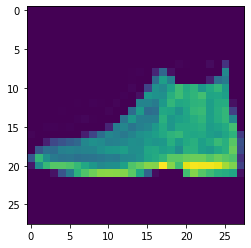

In [51]:
plt.imshow(np.squeeze(x_test[0]))

In [52]:
dict_labels.get(np.argmax(y_pred[0])),np.argmax(y_pred[0]),f'{np.round(100*y_pred[0][np.argmax(y_pred[0])],2)}%'

('Ankle boot', 9, '99.85%')

In [53]:
model3.save('model3') #save model

INFO:tensorflow:Assets written to: model3/assets


In [54]:
model3=tf.keras.models.load_model('model3') #load model

Much more accurate model using the CNN with the same number of epochs.  However, it took longer to train since there were more parameters.  But the accuracy gain is typically more important for the computer vision tasks using CNNs.

# 6.0 Visualizing Convolutions and Pooling

In [55]:
print(y_test[:10]) #notice a random assortment of fashion pieces

[9 2 1 1 6 1 4 6 5 7]


In [56]:
print([dict_labels.get(w) for w in y_test[:10]])

['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']


In [57]:
layer_output=[layer.output for layer in model2.layers]
layer_output

[<KerasTensor: shape=(None, 26, 26, 64) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 13, 13, 64) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 5, 5, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 1600) dtype=float32 (created by layer 'flatten_1')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_2')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_3')>]

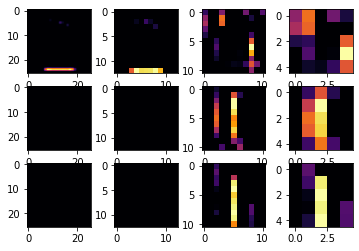

In [58]:
f,axarr = plt.subplots(3,4)
Img1=1
Img2=2
Img3=3
Convolution_Number=2
activation_model=tf.keras.models.Model(inputs=model2.input,outputs=layer_output)
for i in range(4):
  f1=activation_model.predict(np.expand_dims(x_test[Img1],0))[i]
  axarr[0,i].imshow(f1[0,:,:,Convolution_Number],cmap='inferno')
  axarr[0,i].grid(False)
  f2=activation_model.predict(np.expand_dims(x_test[Img2],0))[i]
  axarr[1,i].imshow(f2[0,:,:,Convolution_Number],cmap='inferno')
  axarr[1,i].grid(False)
  f3=activation_model.predict(np.expand_dims(x_test[Img3],0))[i]
  axarr[2,i].imshow(f3[0,:,:,Convolution_Number],cmap='inferno')
  axarr[2,i].grid(False)

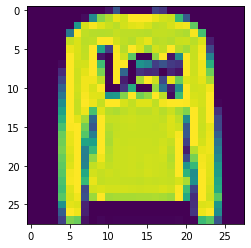

In [59]:
plt.imshow(np.squeeze(x_test[Img1]))

In [60]:
# retrieve weights from the second hidden layer
filters, biases = model2.layers[0].get_weights()

In [61]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

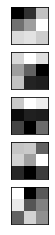

In [62]:
# plot first few filters
n_filters, ix = 5, 1 #64 filters total specified
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 1, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

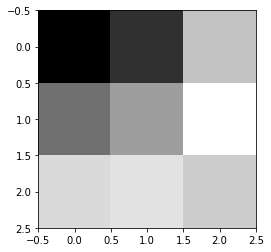

In [63]:
plt.imshow(filters[:,:,0,0],cmap='gray')

In [64]:
filters[:,:,0,0]

array([[0.27257544, 0.40244594, 0.7869305 ],
       [0.56916326, 0.69293773, 0.9495909 ],
       [0.85131025, 0.8718111 , 0.81553316]], dtype=float32)

In [65]:
filters.shape

(3, 3, 1, 64)

In [66]:
x_test[Img1].shape[0]

28

In [67]:
new_image=np.zeros(shape=x_test[Img1].shape)
new_image.shape

(28, 28, 1)

In [68]:
f_wind_i=filters[:,:,0,0].shape[0]
f_wind_j=filters[:,:,0,0].shape[1]
for i in range(0,x_test[Img1].shape[0]):
  for j in range(0,x_test[Img1].shape[1]):
    try:
      list1=np.array(filters[:,:,0,0]) 
      list2=np.array(x_test[Img1][i:i+f_wind_i,j:j+f_wind_j,0])
      new_image[i,j] = sum(sum([ii*jj for (ii,jj) in zip(list1,list2)]))
    except:
      new_image[i,j]=0

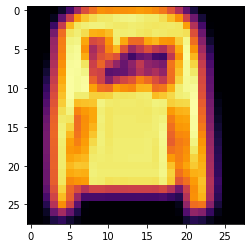

In [69]:
plt.imshow(np.squeeze(new_image),cmap='inferno')

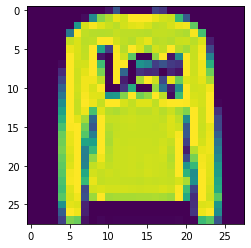

In [70]:
plt.imshow(np.squeeze(x_test[Img1]))